# Keras Tutorial

## Import Utilities & Dependencies

- `print_function` works in Python 2 and Python 3
- Keras uses the NumPy mathematics library to manipulate arrays and matrices. Matplotlib is a plotting library for NumPy: you'll use it to inspect a training data item.
- Import Keras 2.0.6 and the components needed for the model. [FutureWarning due to NumPy 1.14](https://github.com/h5py/h5py/issues/961)
- Import coremltools

In [2]:
from __future__ import print_function
from matplotlib import pyplot as plt

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

import coremltools
# coremltools supports Keras version 2.0.6
print('keras version ', keras.__version__)

/Users/yusuf_kildan/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


keras version  2.1.4


## Load & Pre-Process Data

### Training & Validation Data Sets

`mnist.load_data()` downloads from https://s3.amazonaws.com/img-datasets/mnist.npz — this takes a little while.

In [6]:
# First, get your data!
(x_train, y_train), (x_val, y_val) = mnist.load_data()

### Inspect x & y Data

x_train shape:  (60000, 28, 28)
60000 training samples
x_val shape:  (10000, 28, 28)
10000 validation samples
First x sample
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 2

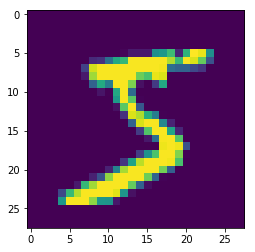

y_train shape:  (60000,)
First 10 y_train elements: [5 0 4 1 9 2 1 3 1 4]


In [7]:
# Inspect x data
print('x_train shape: ', x_train.shape)
# (60000, 28, 28)
print(x_train.shape[0], 'training samples')
# 60000 train samples
print('x_val shape: ', x_val.shape)
# (10000, 28, 28)
print(x_val.shape[0], 'validation samples')
# 10000 validation samples

print('First x sample\n', x_train[0])
# An array of 28 arrays, each containing 28 gray-scale values between 0 and 255
# Plot first x sample
plt.imshow(x_train[0])
plt.show()

# Inspect y data
print('y_train shape: ', y_train.shape)
# (60000,)
print('First 10 y_train elements:', y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]

### Set input & output dimensions

MNIST data items are 28 x 28-pixel images, and you want to classify each as a digit between 0 and 9.

`x_train.shape` is an array of 3 elements: number of data samples, number of rows of each data sample, number of columns of each data sample

In [8]:
img_rows, img_cols = x_train.shape[1], x_train.shape[2]
num_classes = 10

### Reshape x Data & Set Input Shape

- Convolutional neural networks think of images as having width, height and depth. The depth dimension is called channels, and contains color information. Gray-scale images have 1 channel; RGB images have 3 channels.
- Insert the channels, either before or after the image's rows and columns. MNIST data samples are gray-scale, so the number of channels is 1.
- Set the input shape of the sample data, with the channels at the correct end.

In [9]:
# Set input_shape for channels_first or channels_last
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_val = x_val.reshape(x_val.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### Inspect Reshaped x Data

TensorFlow image data format is channels-last.

In [10]:
print('x_train shape:', x_train.shape)
# x_train shape: (60000, 28, 28, 1)
print('x_val shape:', x_val.shape)
# x_val shape: (10000, 28, 28, 1)
print('input_shape:', input_shape)
# input_shape: (28, 28, 1)

x_train shape: (60000, 28, 28, 1)
x_val shape: (10000, 28, 28, 1)
input_shape: (28, 28, 1)


### Convert Data Type & Normalize Values

MNIST image data values are of type `uint8`, in the range [0, 255], but Keras needs values of type `float32`, in the range [0, 1].

In [11]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255
x_val /= 255

### Inspect Normalized x Data

In [12]:
print('First x sample, normalized\n', x_train[0])
# An array of 28 arrays, each containing 28 arrays, each with one value between 0 and 1

First x sample, normalized
 [[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.   

### Reformat y Data

`y_train` is a 1-dimensional array with 60000 elements, but the model needs a 60000 x 10 matrix to represent the 10 categories.

**Note:** Run this cell **once only**! Running it again will produce incorrect results.

In [13]:
print('y_train shape: ', y_train.shape)
# (60000,)
print('First 10 y_train elements:\n', y_train[:10])
# [5 0 4 1 9 2 1 3 1 4]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_val = np_utils.to_categorical(y_val, num_classes)

y_train shape:  (60000,)
First 10 y_train elements:
 [5 0 4 1 9 2 1 3 1 4]


### Inspect Reformatted y Data

`y_train` is now an array of 10-element arrays, each containing all zeros except at the index that the image matches.

In [14]:
print('New y_train shape: ', y_train.shape)
# (60000, 10)
print('First 10 y_train elements, reshaped:\n', y_train[:10])
# An array of 10 arrays, each with 10 elements, 
# all zeros except at index 5, 0, 4, 1, 9 etc.

New y_train shape:  (60000, 10)
First 10 y_train elements, reshaped:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Define  Model Architecture

### [Malireddi's Architecture](https://sriraghu.com/2017/07/06/computer-vision-in-ios-coremlkerasmnist/)

- Malireddi’s architecture is designed to produce a small model, suitable for mobile apps.

In [15]:
model_m = Sequential()
model_m.add(Conv2D(32, (5, 5), input_shape=input_shape, activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.5))
model_m.add(Conv2D(64, (3, 3), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Conv2D(128, (1, 1), activation='relu'))
model_m.add(MaxPooling2D(pool_size=(2, 2)))
model_m.add(Dropout(0.2))
model_m.add(Flatten())
model_m.add(Dense(128, activation='relu'))
model_m.add(Dense(num_classes, activation='softmax'))
# Inspect model's layers, output shapes, number of trainable parameters
print(model_m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         8320      
__________

### [Chollet's Architecture](https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py)

## Train the Model

### Define Callbacks List

In [16]:
callbacks_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5',
        monitor='val_loss', save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='acc', patience=1)
]

### Compile & Fit Model

- On a MacBook Pro, this step takes approximately 15 minutes. Reducing `batch_size` or increasing `epochs` will increase the run time.
- You can run this cell more than once, to improve the model's accuracy.
- To *manually* stop early, click the stop button in the toolbar.

In [17]:
model_m.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
batch_size = 200
epochs = 10

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
model_m.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs,
    callbacks=callbacks_list, validation_data=(x_val, y_val), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.6152 - acc: 0.7987 - val_loss: 0.1405 - val_acc: 0.9591
Epoch 2/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1867 - acc: 0.9416 - val_loss: 0.0773 - val_acc: 0.9774
Epoch 3/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1355 - acc: 0.9573 - val_loss: 0.0666 - val_acc: 0.9797
Epoch 4/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1099 - acc: 0.9649 - val_loss: 0.0623 - val_acc: 0.9809
Epoch 5/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0980 - acc: 0.9690 - val_loss: 0.0485 - val_acc: 0.9860
Epoch 6/10
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0864 - acc: 0.9729 - val_loss: 0.0465 - val_acc: 0.9860
Epoch 7/10
60000/60000 [==============================] - 65s 1ms/step - loss: 0.0809 - acc: 0.9743 - val_loss: 0.0414 - val_acc

## Convert to Core ML Model

In [3]:
output_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# For the first argument, use the filename of the newest .h5 file in the notebook folder.
coreml_mnist = coremltools.converters.keras.convert(
    'best_model.10-0.03.h5', input_names=['image'], output_names=['output'], 
    class_labels=output_labels, image_input_names='image')

0 : conv2d_1_input, <keras.engine.topology.InputLayer object at 0x1820d50e10>
1 : conv2d_1, <keras.layers.convolutional.Conv2D object at 0x1820d6fa50>
2 : conv2d_1__activation__, <keras.layers.core.Activation object at 0x18211a1950>
3 : max_pooling2d_1, <keras.layers.pooling.MaxPooling2D object at 0x1820da9c90>
4 : conv2d_2, <keras.layers.convolutional.Conv2D object at 0x1820dc1b90>
5 : conv2d_2__activation__, <keras.layers.core.Activation object at 0x18216ec8d0>
6 : max_pooling2d_2, <keras.layers.pooling.MaxPooling2D object at 0x11210b0d0>
7 : conv2d_3, <keras.layers.convolutional.Conv2D object at 0x1820e1de10>
8 : conv2d_3__activation__, <keras.layers.core.Activation object at 0x1820d91850>
9 : max_pooling2d_3, <keras.layers.pooling.MaxPooling2D object at 0x1820e6ed90>
10 : flatten_1, <keras.layers.core.Flatten object at 0x1820ec3ad0>
11 : dense_1, <keras.layers.core.Dense object at 0x1820ee3310>
12 : dense_1__activation__, <keras.layers.core.Activation object at 0x1821597e50>
13 : d

### Inspect Core ML model

Check the input type is `imageType`, not multi array

In [4]:
print(coreml_mnist)

input {
  name: "image"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output"



### Add Metadata for Xcode

Substitute your own name and license info for the first two items

In [5]:
coreml_mnist.author = 'Yusuf KILDAN'
coreml_mnist.short_description = 'Image based digit recognition (MNIST)'
coreml_mnist.input_description['image'] = 'Digit image'
coreml_mnist.output_description['output'] = 'Probability of each digit'
coreml_mnist.output_description['classLabel'] = 'Labels of digits'

### Save the Core ML Model

In [6]:
coreml_mnist.save('MNISTClassifier.mlmodel')